In [8]:
import numpy as np
import os

import matplotlib.pyplot as plt

<Figure size 9000x3600 with 0 Axes>

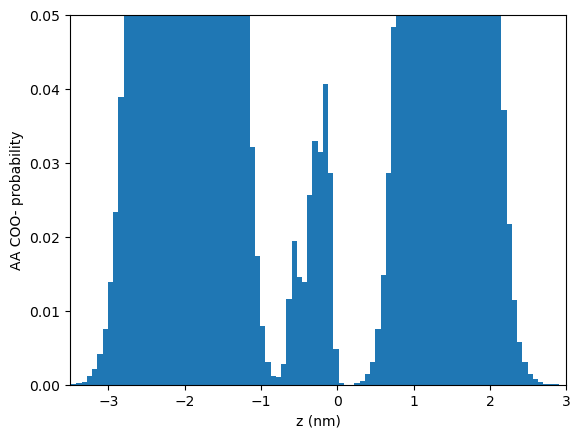

<Figure size 9000x3600 with 0 Axes>

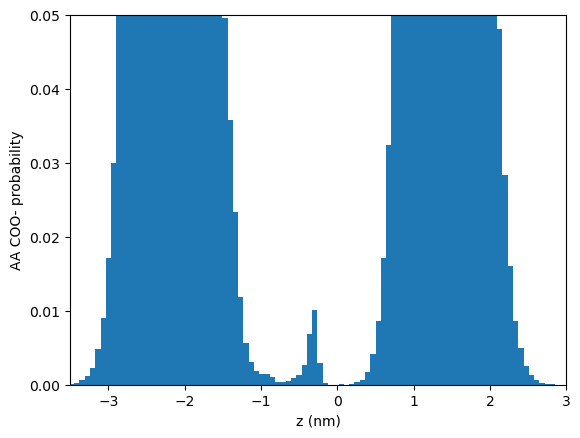

In [ ]:
threshold = 0.33
window = 500

colors = ["C0", "C1", "C2", "C3", "C4", "grey"]
pdbids = {"aac1": "2C3E", "ucp1": "8HBV"}

def compile_rmsd():

    inputpath = "/home/jonathan/Documents/grabelab/aac1-ucp1/long-aac1-ucp1/aa_z_dist_2"

    servers = ["wynton", "degrabo"]
    proteins = ["aac1", "ucp1"]

    #loop over servers, proteins, and parallel runs
    for protein in proteins:

        ci = 0

        aa_z = []

        plt.figure(figsize = (15,6), dpi=600)

        for server in servers:
            for run in range(1,5):
                if server == "degrabo" and run > 2:
                    continue

                #step is in microseconds per saved frame
                if server == "wynton" and (run == 3 or run == 4):
                    step = 1/10000
                    inc = 2
                else:
                    step = 1/5000
                    inc = 1

                dists = []
 
                for seg in range(1,20):

                    file = f"{inputpath}/{server}/{protein}/run0{run}/{protein}-{server}-run{str(run).zfill(2)}-seg{str(seg).zfill(2)}-aaz.npy"

                    if os.path.exists(file):
                        dists.append(np.load(file))

                dists = np.concatenate(dists).flatten()

                aa_z.append(dists[::inc])

                plt.show()
                ci += 1


        plt.hist(np.concatenate(aa_z), bins = 100, density=True)

        plt.xlim(-3.5,3)
        plt.ylim(0,0.05)
        plt.xlabel("z (nm)")
        plt.ylabel("AA COO- probability")
        plt.savefig(f"{inputpath}/aaz_{protein}.svg", bbox_inches='tight', format ='svg')
        


compile_rmsd()